In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import train_test_split

In [54]:
df_train = pd.read_csv(r"case2_training.csv", dtype=float)
df_test = pd.read_csv(r"case2_testing.csv", dtype=float)
df_train.head()

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1.0,4.0,32.0,5.0,1.0,1.0,4.526975,0.739994,230.552998,0.0
1,2.0,2.0,87.0,4.0,1.0,1.0,4.548455,0.862642,348.203425,0.0
2,3.0,5.0,277.0,5.0,1.0,2.0,4.965732,0.515548,430.462327,0.0
3,4.0,3.0,246.0,2.0,1.0,1.0,4.752735,0.561547,149.305433,1.0
4,5.0,1.0,155.0,2.0,1.0,2.0,3.890960,0.817142,165.264184,1.0


## Data Analysis

### Region

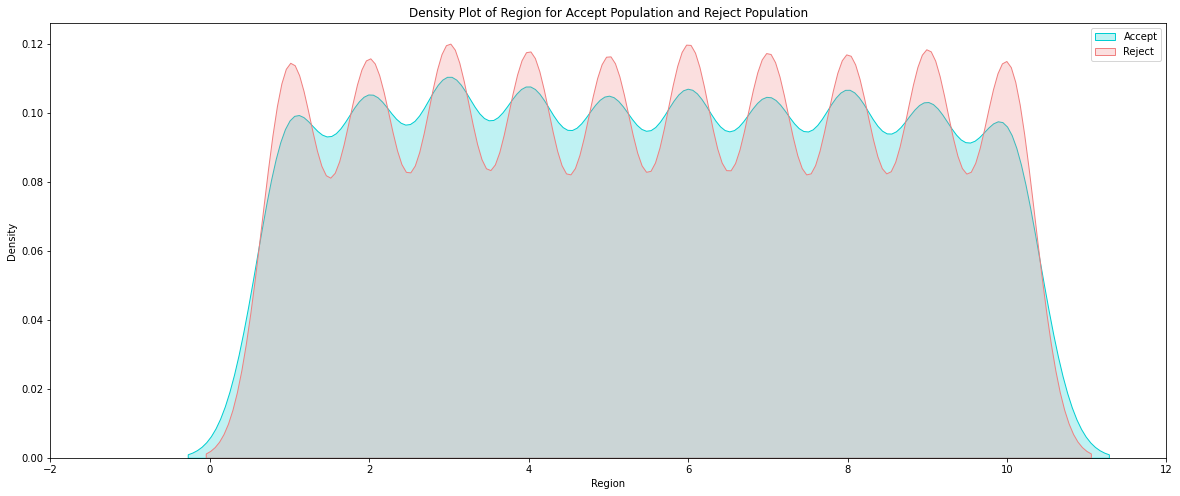

In [55]:
plt.figure(figsize=(20,8))
ax = sns.kdeplot(df_train["Region"][df_train.Accept == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Region"][df_train.Accept == 0], color="lightcoral", fill=True)
plt.legend(['Accept', 'Reject'])
plt.title('Density Plot of Region for Accept Population and Reject Population')
ax.set(xlabel='Region')
plt.xlim(-2,12)
plt.show()

In [56]:
# no significant difference

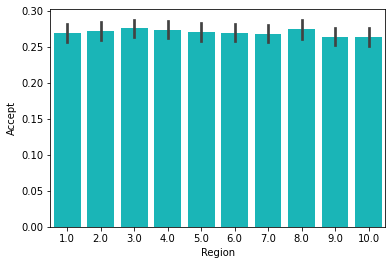

In [57]:
sns.barplot(x='Region', y='Accept', data = df_train, color="darkturquoise")
plt.show()

### Date

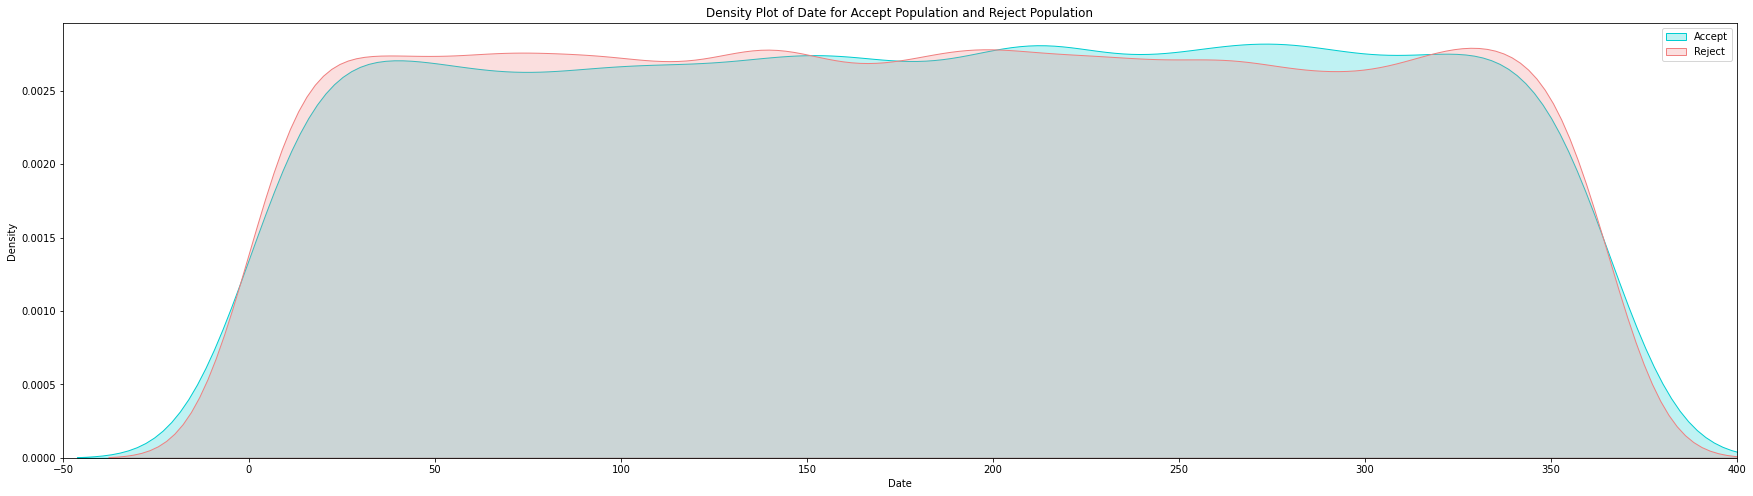

In [58]:
plt.figure(figsize=(30,8))
ax = sns.kdeplot(df_train["Date"][df_train.Accept == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Date"][df_train.Accept == 0], color="lightcoral", fill=True)
plt.legend(['Accept', 'Reject'])
plt.title('Density Plot of Date for Accept Population and Reject Population')
ax.set(xlabel='Date')
plt.xlim(-50, 400)
plt.show()

In [59]:
# The more days you rent, the more likely you will rent

### Weekday

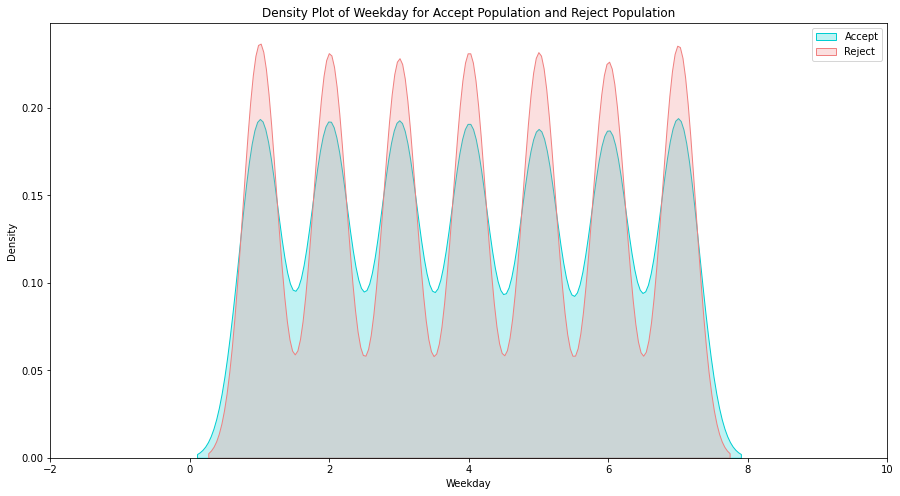

In [60]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Weekday"][df_train.Accept == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Weekday"][df_train.Accept == 0], color="lightcoral", fill=True)
plt.legend(['Accept', 'Reject'])
plt.title('Density Plot of Weekday for Accept Population and Reject Population')
ax.set(xlabel='Weekday')
plt.xlim(-2, 10)
plt.show()

In [61]:
# no significant difference

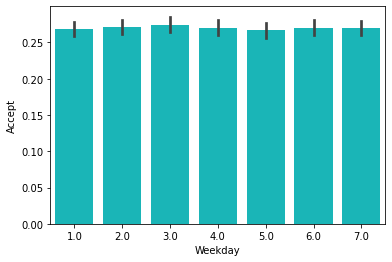

In [62]:
sns.barplot(x='Weekday', y='Accept', data = df_train, color="darkturquoise")
plt.show()

### Apartment

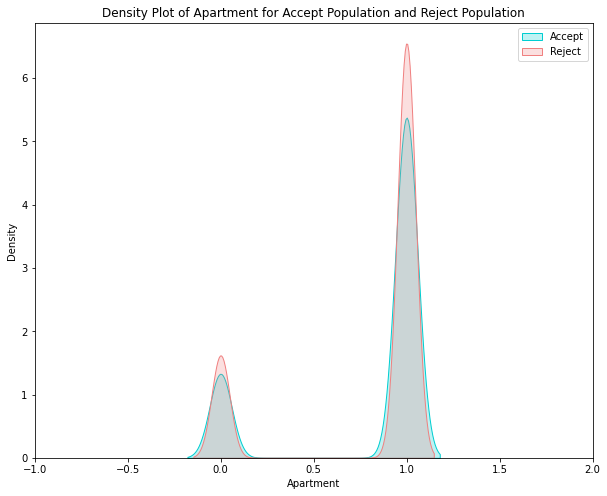

In [63]:
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df_train["Apartment"][df_train.Accept == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Apartment"][df_train.Accept == 0], color="lightcoral", fill=True)
plt.legend(['Accept', 'Reject'])
plt.title('Density Plot of Apartment for Accept Population and Reject Population')
ax.set(xlabel='Apartment')
plt.xlim(-1, 2)
plt.show()

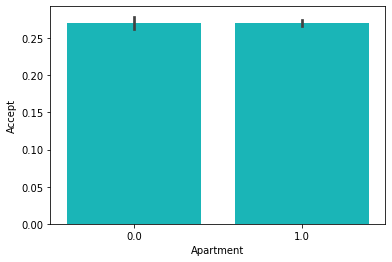

In [64]:
sns.barplot(x='Apartment', y='Accept', data = df_train, color="darkturquoise")
plt.show()

### Price

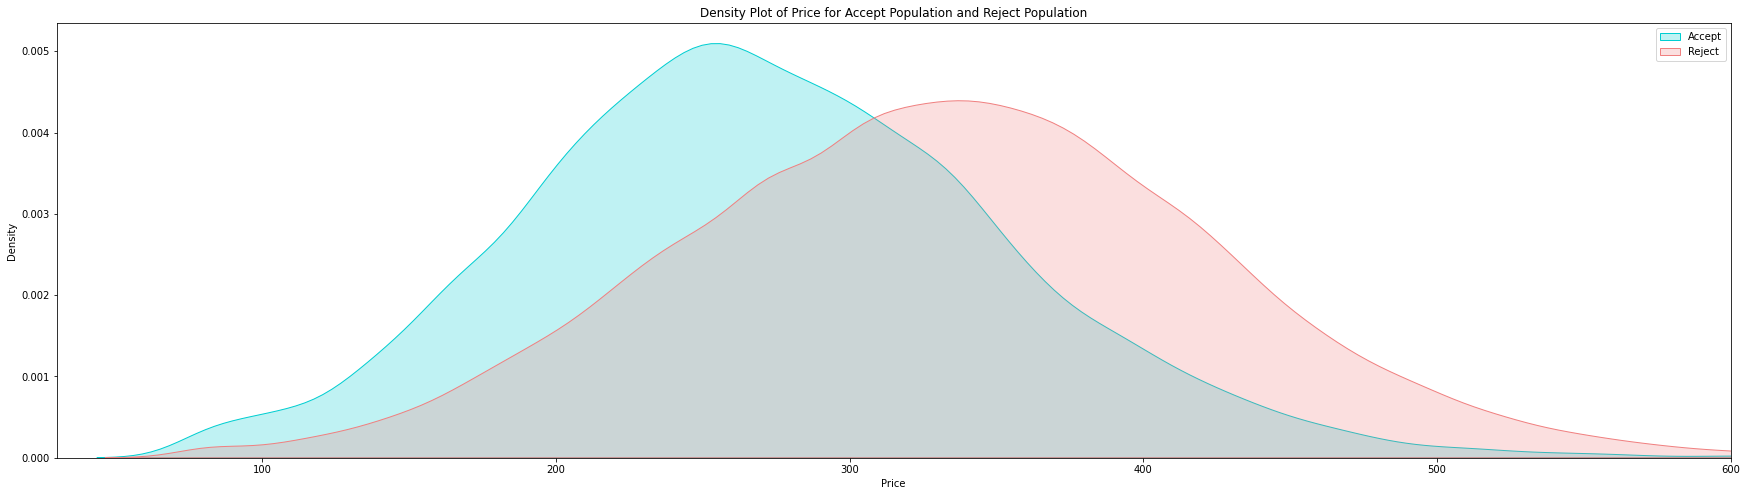

In [65]:
plt.figure(figsize=(30,8))
ax = sns.kdeplot(df_train["Price"][df_train.Accept == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Price"][df_train.Accept == 0], color="lightcoral", fill=True)
plt.legend(['Accept', 'Reject'])
plt.title('Density Plot of Price for Accept Population and Reject Population')
ax.set(xlabel='Price')
plt.xlim(30,600)
plt.show()

In [66]:
# high price will lead to high rejection

### Bed

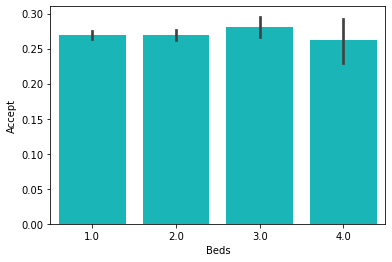

In [67]:
sns.barplot(x='Beds', y='Accept', data = df_train, color="darkturquoise")
plt.show()

### Pic Quality

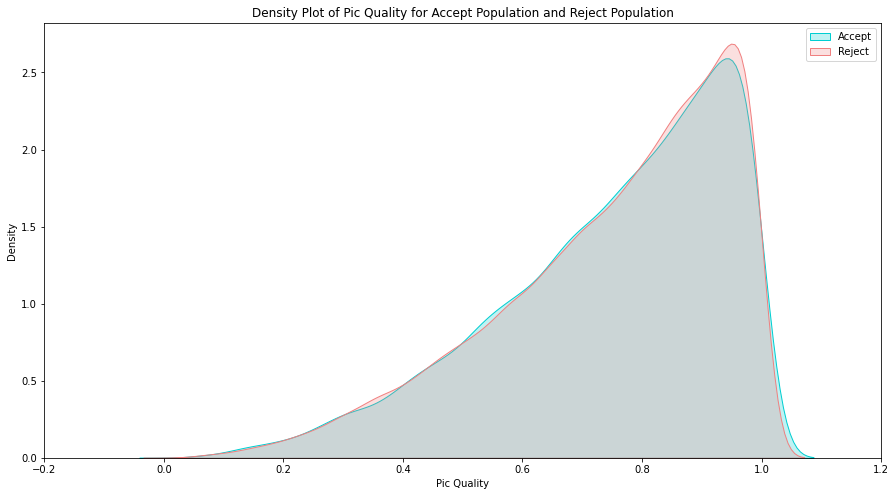

In [68]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Pic Quality"][df_train.Accept == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Pic Quality"][df_train.Accept == 0], color="lightcoral", fill=True)
plt.legend(['Accept', 'Reject'])
plt.title('Density Plot of Pic Quality for Accept Population and Reject Population')
ax.set(xlabel='Pic Quality')
plt.xlim(-0.2,1.2)
plt.show()

### Review

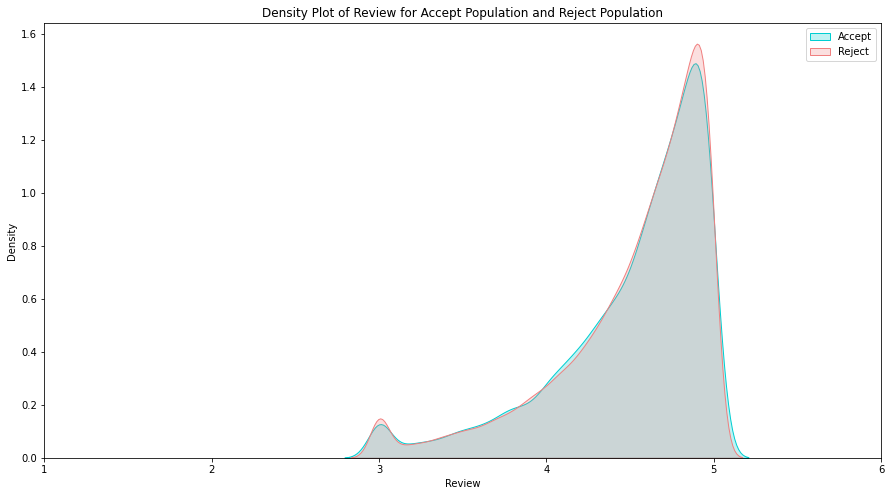

In [69]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df_train["Review"][df_train.Accept == 1], color="darkturquoise", fill=True)
sns.kdeplot(df_train["Review"][df_train.Accept == 0], color="lightcoral", fill=True)
plt.legend(['Accept', 'Reject'])
plt.title('Density Plot of Review for Accept Population and Reject Population')
ax.set(xlabel='Review')
plt.xlim(1,6)
plt.show()

## Data Processing

In [70]:
# transform to dummy
df_train1 = pd.get_dummies(df_train, columns = ['Region'], drop_first=True,dtype=int)
df_test1 = pd.get_dummies(df_test, columns = ['Region'], drop_first=True,dtype=int)


In [71]:
df_train

,ID,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price,Accept
0,1.0,4.0,32.0,5.0,1.0,1.0,4.526975,0.739994,230.552998,0.0
1,2.0,2.0,87.0,4.0,1.0,1.0,4.548455,0.862642,348.203425,0.0
2,3.0,5.0,277.0,5.0,1.0,2.0,4.965732,0.515548,430.462327,0.0
3,4.0,3.0,246.0,2.0,1.0,1.0,4.752735,0.561547,149.305433,1.0
4,5.0,1.0,155.0,2.0,1.0,2.0,3.890960,0.817142,165.264184,1.0
...,...,...,...,...,...,...,...,...,...,...
49995,49996.0,1.0,68.0,6.0,0.0,1.0,3.669174,0.858494,199.187671,1.0
49996,49997.0,9.0,217.0,1.0,1.0,2.0,4.849890,0.678795,348.927419,0.0
49997,49998.0,10.0,100.0,3.0,1.0,2.0,4.971527,0.993316,317.187052,1.0
49998,49999.0,10.0,170.0,3.0,1.0,2.0,4.951120,0.792698,460.453975,0.0


In [72]:
df_train1 = pd.get_dummies(df_train1, columns = ['Weekday'], drop_first=True,dtype=int)
df_test1 = pd.get_dummies(df_test1, columns = ['Weekday'], drop_first=True,dtype=int)

In [73]:
# divide the Date into 7 groups
count=0
for i in df_train.Date:
    df_train1.loc[count, 'day_3']=1 if 1<=i<=3 else 0
    df_train1.loc[count,'day_7']=1 if 4<=i<=7 else 0
    df_train1.loc[count,'day14']=1 if 8<=i<=14 else 0
    df_train1.loc[count,'day_31']=1 if 15<=i<=31 else 0
    df_train1.loc[count,'day_90']=1 if 32<=i<=90 else 0
    df_train1.loc[count,'day_180']=1 if 91<=i<=180 else 0
    df_train1.loc[count,'day_365']=1 if 181<=i<=365 else 0
    count+=1

for i in df_test.Date:
    df_test1.loc[count, 'day_3']=1 if 1<=i<=3 else 0
    df_test1.loc[count,'day_7']=1 if 4<=i<=7 else 0
    df_test1.loc[count,'day14']=1 if 8<=i<=14 else 0
    df_test1.loc[count,'day_31']=1 if 15<=i<=31 else 0
    df_test1.loc[count,'day_90']=1 if 32<=i<=90 else 0
    df_test1.loc[count,'day_180']=1 if 91<=i<=180 else 0
    df_test1.loc[count,'day_365']=1 if 181<=i<=365 else 0
    count+=1

In [74]:
X = df_train1.drop(columns=["ID","Accept"])
y = df_train1.drop(columns="ID")["Accept"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

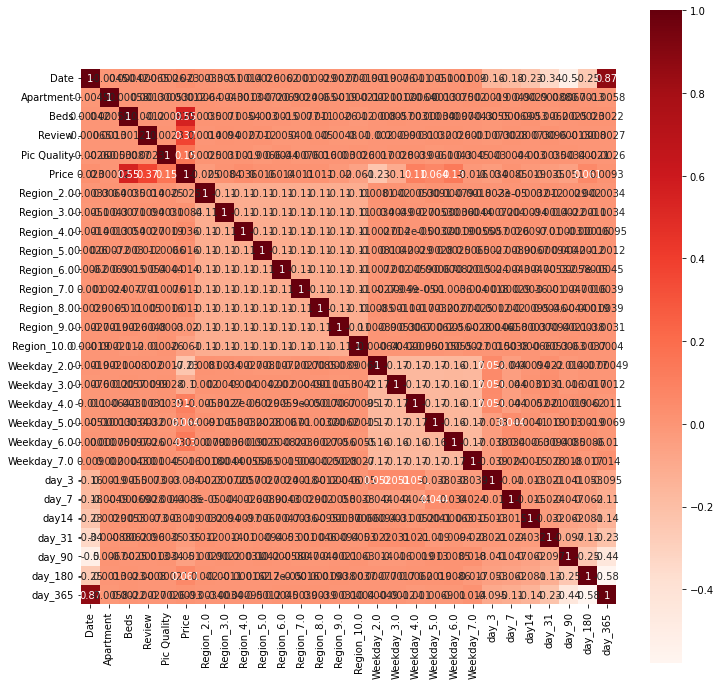

In [75]:

d = X.corr()
plt.subplots(figsize = (12,12))
sns.heatmap(d,annot = True,vmax = 1,square = True,cmap = "Reds")
plt.show()

## Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)


In [77]:
X_train

,Date,Apartment,Beds,Review,Pic Quality,Price,Region_2.0,Region_3.0,Region_4.0,Region_5.0,...,Weekday_5.0,Weekday_6.0,Weekday_7.0,day_3,day_7,day14,day_31,day_90,day_180,day_365
8950,301.0,1.0,3.0,4.292140,0.996922,512.101654,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38421,327.0,0.0,1.0,4.260134,0.956784,294.956584,0,0,0,1,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19363,171.0,1.0,1.0,4.804470,0.070482,268.901498,0,0,1,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30157,162.0,1.0,3.0,4.289832,0.731843,334.096818,0,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14294,260.0,1.0,2.0,4.851546,0.699097,449.412770,1,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,162.0,1.0,3.0,4.774007,0.940226,491.361798,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32511,78.0,1.0,1.0,4.446876,0.799223,291.376034,0,0,1,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5192,36.0,1.0,1.0,4.386221,0.707985,260.888530,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12172,343.0,1.0,1.0,4.946952,0.947750,216.512033,0,1,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [78]:
model.fit(X_train, y_train.values.reshape(-1))
y_pred = model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.7446

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)

0.6163283499346215

In [81]:
lr_l1 = LogisticRegression(penalty="l1", C=0.5, solver="liblinear")
lr_l2 = LogisticRegression(penalty="l2", C=0.5, solver="liblinear")

In [82]:
lr_l1.fit(X_train, y_train)
lr_l2.fit(X_train, y_train)

LogisticRegression(C=0.5, solver='liblinear')

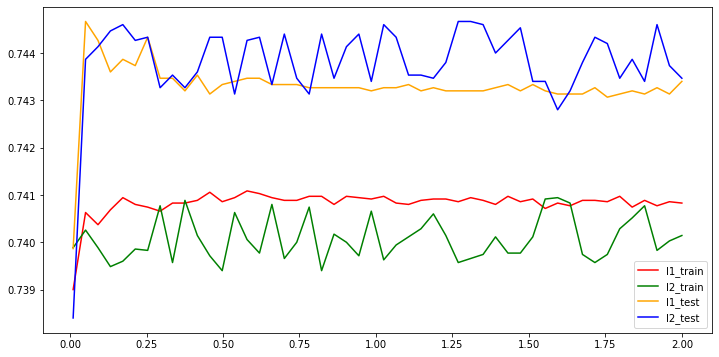

In [83]:
# 训练集表现
l1_train_predict = []
l2_train_predict = []

# 测试集表现
l1_test_predict = []
l2_test_predict = []

for c in np.linspace(0.01, 2, 50) :
    lr_l1 = LogisticRegression(penalty="l1", C=c, solver="liblinear", max_iter=1000)
    lr_l2 = LogisticRegression(penalty='l2', C=c, solver='liblinear', max_iter=1000)
    
    # 训练模型，记录L1正则化模型在训练集测试集上的表现
    lr_l1.fit(X_train, y_train)
    l1_train_predict.append(accuracy_score(lr_l1.predict(X_train), y_train))
    l1_test_predict.append(accuracy_score(lr_l1.predict(X_test), y_test))
    
    # 记录L2正则化模型的表现
    lr_l2.fit(X_train, y_train)
    l2_train_predict.append(accuracy_score(lr_l2.predict(X_train), y_train))
    l2_test_predict.append(accuracy_score(lr_l2.predict(X_test), y_test))
    
data = [l1_train_predict, l2_train_predict, l1_test_predict, l2_test_predict]
label = ['l1_train', 'l2_train', 'l1_test', "l2_test"]
color = ['red', 'green', 'orange', 'blue']

plt.figure(figsize=(12, 6))
for i in range(4) :
    plt.plot(np.linspace(0.01, 2, 50), data[i], label=label[i], color=color[i])

plt.legend(loc="best")#并行调参
plt.show()


In [84]:
# choose l2 when c is 1.3

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel

In [86]:
LR_ = LogisticRegression(penalty="l1", solver='liblinear', C=1.3, random_state=1)
cross_val_score(LR_, X, y, cv=10).mean()

0.74134

In [87]:
X_embeded = SelectFromModel(LR_, norm_order=1).fit_transform(X, y)
cross_val_score(LR_, X_embeded, y, cv=10).mean()

0.74134

In [88]:
X_embeded.shape

(50000, 28)

c:\Users\Venti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Venti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Venti\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


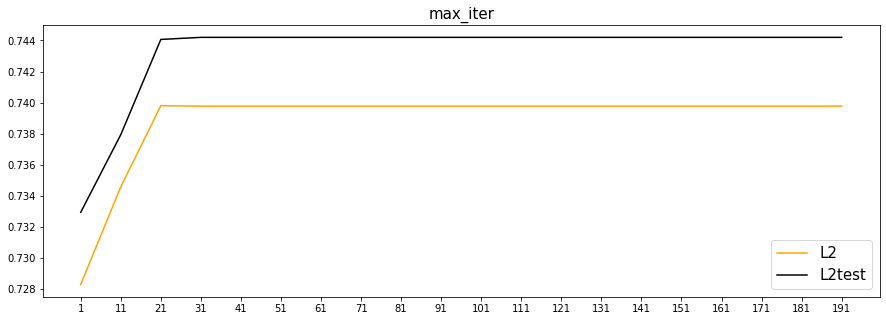

In [89]:
l2 = []
l2test = []
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=1)
for i in np.arange(1,201,10):
    lrl2 = LogisticRegression(penalty="l2",solver="liblinear",C=1.3,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,Ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),Ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),Ytest))
graph = [l2,l2test]
color = ["orange","black"]
label = ["L2","L2test"]
plt.figure(figsize=(15,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
    plt.legend(loc=4,fontsize=15)
    plt.xticks(np.arange(1,201,10))
plt.title('max_iter',fontsize=15)
plt.show()

In [90]:
new_model = LogisticRegression(penalty="l2",solver="liblinear",C=1.3,max_iter=30)
new_model.fit(X_train, y_train)
y_pred_new = new_model.predict(X_test)

In [91]:
score = accuracy_score(y_pred_new, y_test)
score

0.7442

In [92]:
auc_score = roc_auc_score(y_test, y_pred_new, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
auc_score

0.6151034726789205

In [93]:
prob = new_model.predict_proba(X_test)[:,1]

In [94]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob)
thresholds

array([1.88197414, 0.88197414, 0.87402941, ..., 0.02983494, 0.02981414,
       0.01230481])

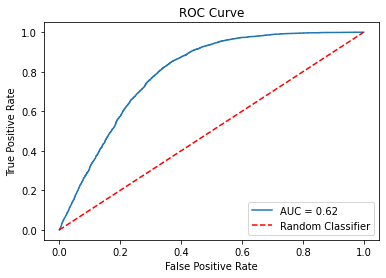

In [95]:
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')  # 绘制ROC曲线，标注AUC的值
# 随即分类器没有分类能力，其FPR=TPR。随机分类器的性能通常表示为ROC曲线上的对角线
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Classifier')  # 绘制随机分类器的ROC曲线
plt.xlabel('False Positive Rate')  # x轴标签为FPR
plt.ylabel('True Positive Rate')   # y轴标签为TPR
plt.title('ROC Curve')             # 设置标题
plt.legend()                    
plt.show()      

In [96]:
X1 = df_train.drop(columns=["ID","Accept"])
y1 = df_train.drop(columns="ID")["Accept"]
X_train2,X_test2,y_train2,y_test2 = train_test_split(X1,y1,test_size=0.3,random_state=1)

In [97]:
y_t = np.array(y_test2)
error_list = []
for i in range(15000):
    if y_pred_new[i] != y_t[i]:
        error_list.append(i)
len(error_list)

3837

In [98]:
X_error = X_test2.iloc[error_list].reset_index(drop=True)
X_error.shape
X_error

,Region,Date,Weekday,Apartment,Beds,Review,Pic Quality,Price
0,2.0,197.0,2.0,1.0,2.0,3.638557,0.831785,115.232700
1,9.0,289.0,3.0,1.0,2.0,4.852673,0.863303,349.259181
2,10.0,230.0,7.0,1.0,1.0,4.048349,0.335545,173.414580
3,5.0,53.0,5.0,1.0,3.0,4.449992,0.863685,346.527174
4,5.0,183.0,2.0,1.0,1.0,4.974367,0.924805,270.098362
...,...,...,...,...,...,...,...,...
3832,7.0,117.0,6.0,0.0,3.0,4.980383,0.981943,602.952323
3833,4.0,97.0,7.0,1.0,1.0,3.023800,0.383118,129.000489
3834,8.0,43.0,2.0,1.0,1.0,4.647318,0.818800,170.785057
3835,2.0,179.0,5.0,0.0,4.0,4.354545,0.803734,463.820263


In [99]:
y_test_error = y_test2.iloc[error_list].reset_index(drop=True)
y_pred_new_error = pd.DataFrame(y_pred_new).iloc[error_list].reset_index(drop=True)

In [100]:
X_merge = pd.concat([X_error, y_test_error, y_pred_new_error], axis=1)

In [101]:
X_merge = X_merge.rename(columns={0: "Predict"})
X_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3837 entries, 0 to 3836
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       3837 non-null   float64
 1   Date         3837 non-null   float64
 2   Weekday      3837 non-null   float64
 3   Apartment    3837 non-null   float64
 4   Beds         3837 non-null   float64
 5   Review       3837 non-null   float64
 6   Pic Quality  3837 non-null   float64
 7   Price        3837 non-null   float64
 8   Accept       3837 non-null   float64
 9   Predict      3837 non-null   float64
dtypes: float64(10)
memory usage: 299.9 KB


In [102]:
X_merge_0to1 = X_merge[X_merge.Accept==0]
X_merge_0to1.to_csv(r'0to1.csv', index=False)

In [103]:
X_merge_1to0 = X_merge[X_merge.Accept==1]
X_merge_1to0.to_csv(r'1to0.csv', index=False)

<Figure size 360x360 with 0 Axes>

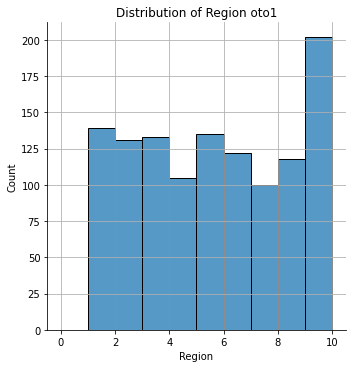

<Figure size 360x360 with 0 Axes>

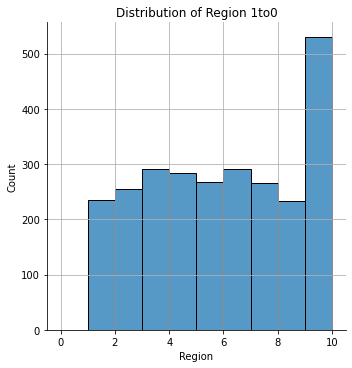

<Figure size 360x360 with 0 Axes>

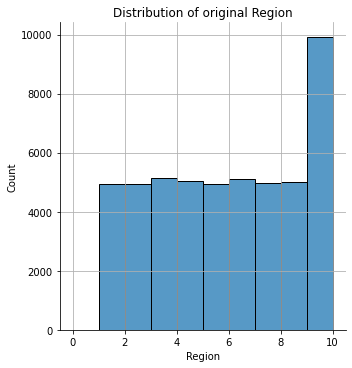

In [104]:
### Region

#0to1
plt.figure(figsize=(5, 5))
sns.displot(X_merge_0to1['Region'],bins=[i for i in range(0,11,1)], kde=False)
plt.title("Distribution of Region oto1")
plt.grid()
plt.show()

#1to0
plt.figure(figsize=(5, 5))
sns.displot(X_merge_1to0['Region'],bins=[i for i in range(0,11,1)], kde=False)
plt.title("Distribution of Region 1to0")
plt.grid()
plt.show()

#original
plt.figure(figsize=(5, 5))
sns.displot(df_train['Region'],bins=[i for i in range(0,11,1)], kde=False)
plt.title("Distribution of original Region")
plt.grid()
plt.show()

<Figure size 360x360 with 0 Axes>

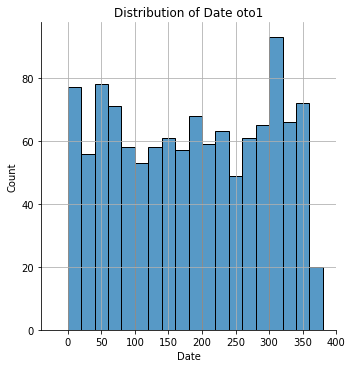

<Figure size 360x360 with 0 Axes>

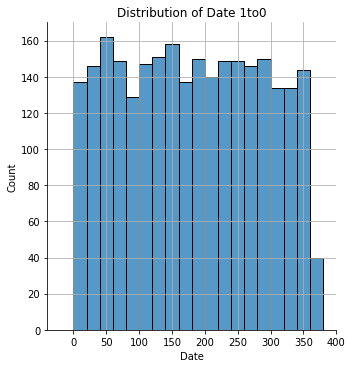

<Figure size 360x360 with 0 Axes>

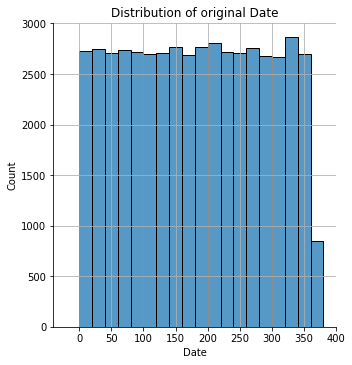

In [107]:
### Date

#0to1
plt.figure(figsize=(5, 5))
sns.displot(X_merge_0to1['Date'],bins=[i for i in range(-20,400,20)], kde=False)
plt.title("Distribution of Date 0to1")
plt.grid()
plt.show()

#1to0
plt.figure(figsize=(5, 5))
sns.displot(X_merge_1to0['Date'],bins=[i for i in range(-20,400,20)], kde=False)
plt.title("Distribution of Date 1to0")
plt.grid()
plt.show()

#original
plt.figure(figsize=(5, 5))
sns.displot(df_train['Date'],bins=[i for i in range(-20,400,20)], kde=False)
plt.title("Distribution of original Date")
plt.grid()
plt.show()

<Figure size 360x360 with 0 Axes>

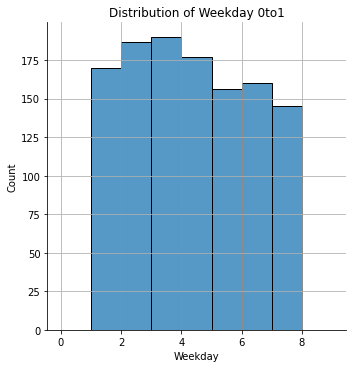

<Figure size 360x360 with 0 Axes>

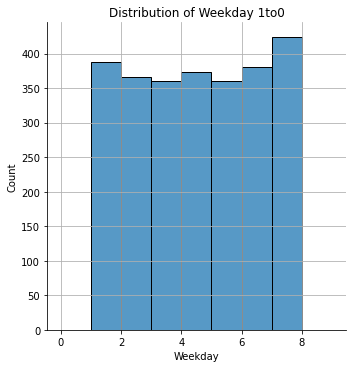

<Figure size 360x360 with 0 Axes>

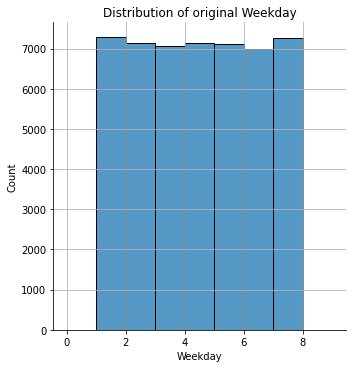

In [113]:
### Weekday

#0to1
plt.figure(figsize=(5, 5))
sns.displot(X_merge_0to1['Weekday'],bins=[i for i in range(0,10,1)], kde=False)
plt.title("Distribution of Weekday 0to1")
plt.grid()
plt.show()

#1to0
plt.figure(figsize=(5, 5))
sns.displot(X_merge_1to0['Weekday'],bins=[i for i in range(0,10,1)], kde=False)
plt.title("Distribution of Weekday 1to0")
plt.grid()
plt.show()

#original
plt.figure(figsize=(5, 5))
sns.displot(df_train['Weekday'],bins=[i for i in range(0,10,1)], kde=False)
plt.title("Distribution of original Weekday")
plt.grid()
plt.show()

<Figure size 360x360 with 0 Axes>

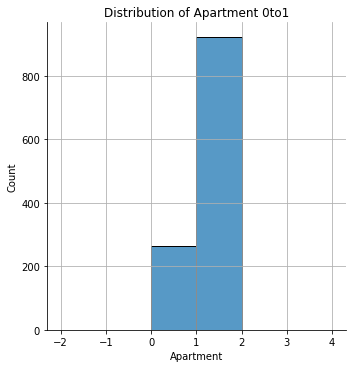

<Figure size 360x360 with 0 Axes>

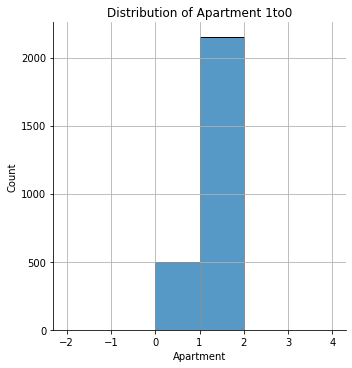

<Figure size 360x360 with 0 Axes>

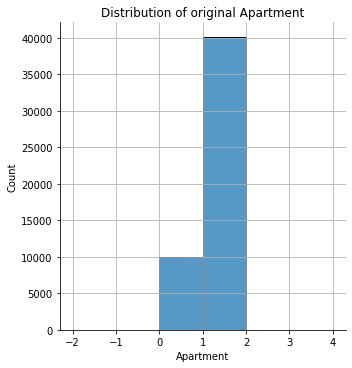

In [118]:
### Apartment

#0to1
plt.figure(figsize=(5, 5))
sns.displot(X_merge_0to1['Apartment'],bins=[i for i in range(-2,5,1)], kde=False)
plt.title("Distribution of Apartment 0to1")
plt.grid()
plt.show()

#1to0
plt.figure(figsize=(5, 5))
sns.displot(X_merge_1to0['Apartment'],bins=[i for i in range(-2,5,1)], kde=False)
plt.title("Distribution of Apartment 1to0")
plt.grid()
plt.show()

#original
plt.figure(figsize=(5, 5))
sns.displot(df_train['Apartment'],bins=[i for i in range(-2,5,1)], kde=False)
plt.title("Distribution of original Apartment")
plt.grid()
plt.show()

<Figure size 360x360 with 0 Axes>

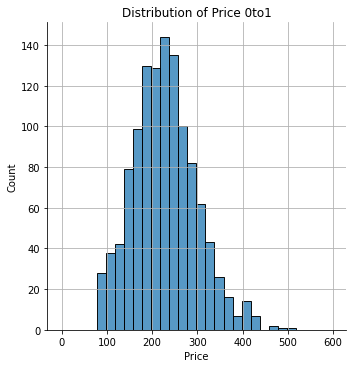

<Figure size 360x360 with 0 Axes>

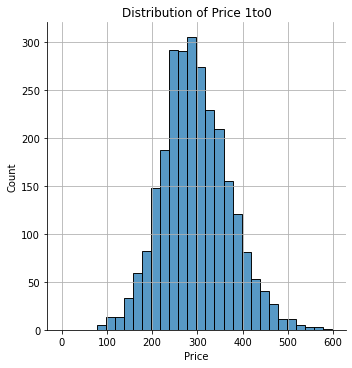

<Figure size 360x360 with 0 Axes>

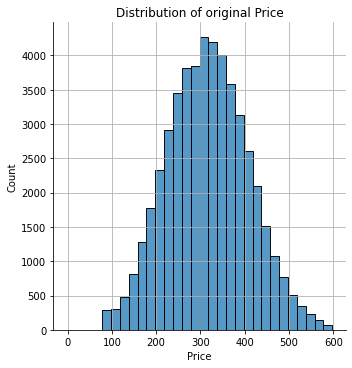

In [122]:
### Price

#0to1
plt.figure(figsize=(5, 5))
sns.displot(X_merge_0to1['Price'],bins=[i for i in range(-2,600,20)], kde=False)
plt.title("Distribution of Price 0to1")
plt.grid()
plt.show()

#1to0
plt.figure(figsize=(5, 5))
sns.displot(X_merge_1to0['Price'],bins=[i for i in range(-2,600,20)], kde=False)
plt.title("Distribution of Price 1to0")
plt.grid()
plt.show()

#original
plt.figure(figsize=(5, 5))
sns.displot(df_train['Price'],bins=[i for i in range(-2,600,20)], kde=False)
plt.title("Distribution of original Price")
plt.grid()
plt.show()

<Figure size 360x360 with 0 Axes>

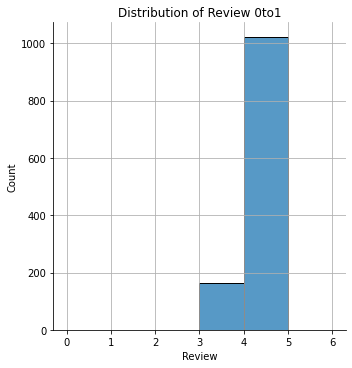

<Figure size 360x360 with 0 Axes>

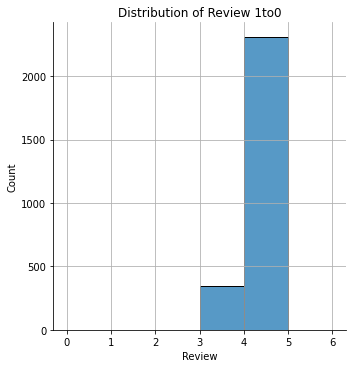

<Figure size 360x360 with 0 Axes>

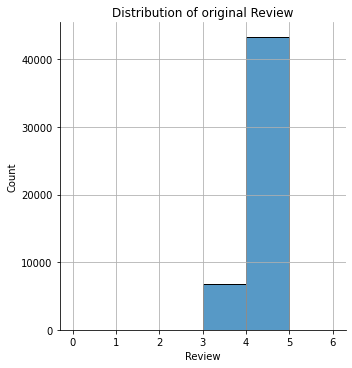

In [127]:
### Review

#0to1
plt.figure(figsize=(5, 5))
sns.displot(X_merge_0to1['Review'],bins=[i for i in range(0,7,1)], kde=False)
plt.title("Distribution of Review 0to1")
plt.grid()
plt.show()

#1to0
plt.figure(figsize=(5, 5))
sns.displot(X_merge_1to0['Review'],bins=[i for i in range(0,7,1)], kde=False)
plt.title("Distribution of Review 1to0")
plt.grid()
plt.show()

#original
plt.figure(figsize=(5, 5))
sns.displot(df_train['Review'],bins=[i for i in range(0,7,1)], kde=False)
plt.title("Distribution of original Review")
plt.grid()
plt.show()